In [1]:
from tqdm import tqdm
import cv2, os
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances
from utility_evaluation import *

## Evaluate

## Precision - Recall - F-measure

In [2]:
# Load pre-computed information from npz file
all_files = np.load('CityDB_features_VGGS.npz')['all_files']
all_features = np.load('CityDB_features_VGGS.npz')['all_features']

In [3]:
lp_text = np.asarray([all_files[jj].split('_')[1].split('.')[0] for jj in range(len(all_files))])

## Get NONE Index
nonIndx = np.asarray([jj for jj in range(len(all_files)) if all_files[jj].split('_')[1].split('.')[0] == 'NONE'])
print('None Indices: : ' + str(len(nonIndx)))

## Get valid file names and corresponding LP texts
file_names = np.delete(all_files, nonIndx)
all_features = np.delete(all_features, nonIndx, axis=0)
lp_text = np.delete(lp_text, nonIndx)

## get Pairwise distance array
pdistArr = pairwise_distances(all_features, metric='cosine')  # for LP
maxDist = np.max(pdistArr)
np.fill_diagonal(pdistArr, 50)

None Indices: : 77


In [4]:
## Precision and Recall Measurements related evaluation
tPcList, fPcList, fNcList, gtcList, thVal_list = get_counts_prf_measures(pdistArr, 
                                                        lp_text, verbose=False)

In [6]:
## Select best result based on best f-score
thVal_final, pr_final, recl_final, fm_final = analyze_precision_recall_list(tPcList, fPcList, 
                                                               fNcList, gtcList, thVal_list, verbose=False)
#print((thVal_final, pr_final, recl_final, fm_final))
print('Threshold Value: '+ str(thVal_final))
print('Precision: '+ str(pr_final))
print('Recall: '+ str(recl_final))
print('F-Measure: '+ str(fm_final))

Threshold Value: 0.37
Precision: 0.9220967
Recall: 0.76796913
F-Measure: 0.838005


## AR Plot

In [7]:
from collections import Counter
import matplotlib.pyplot as plt

In [8]:
## Statistics
unq_lps = np.array(list(Counter(lp_text).keys())) # equals to list(set(words))
num_samp_lp = np.array(list(Counter(lp_text).values())) # counts the elements' frequency

print('Total Number of LPs: ' + str(len(lp_text)))
print('Number of unique LPs: ' + str(len(unq_lps)))
print('Number of single LPs: ' + str(len(np.where(num_samp_lp == 1)[0])))    

Total Number of LPs: 2099
Number of unique LPs: 862
Number of single LPs: 409


## Generally, we should exclude the single LP cases from this evaluation

1690
(1690, 1690)


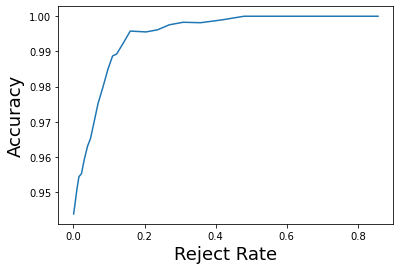

In [9]:
# First remove the LPs with single appearance. Note: this evaluation assumes 
# that all LP must have at least one pair
single_lp_indices = np.where(num_samp_lp == 1)[0]
single_lp_list = unq_lps[single_lp_indices].tolist()

keep_indices = [jj for jj in range(len(lp_text)) if lp_text[jj] not in single_lp_list]
print(len(keep_indices))

pdistArr_non_single = pdistArr[keep_indices, :]
pdistArr_non_single = pdistArr_non_single[:, keep_indices]
print(pdistArr_non_single.shape)

lp_text_non_single = lp_text[keep_indices]

## Get the accuracy and reject-rates and plot them
#thVal_list = np.arange(0.1, 0.3, 0.02)
accuracy, rejRate = get_accuracy_reject_characteristics(pdistArr_non_single, 
                                                        lp_text_non_single, 
                                                        thVal_list=None)

plt.plot(rejRate, accuracy, '-')
plt.xlabel('Reject Rate', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
#plt.savefig(save_file_name.split('.')[0]+'.png', dpi=250)
plt.show()

## Like in the paper - where we did not exclude the single LP cases to respect the dataset

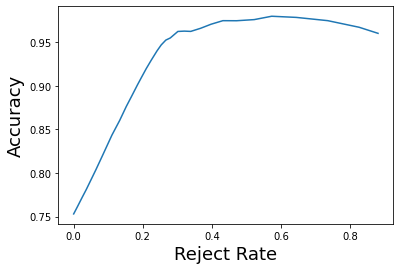

In [10]:
## Get the accuracy and reject-rates and plot them
#thVal_list = np.arange(0.1, 0.3, 0.02)
accuracy, rejRate = get_accuracy_reject_characteristics(pdistArr, 
                                                        lp_text, 
                                                        thVal_list=None)

plt.plot(rejRate, accuracy, '-')
plt.xlabel('Reject Rate', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
#plt.savefig(save_file_name.split('.')[0]+'.png', dpi=250)
plt.show()